Load the data sets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load the datasets
boiler_input_df = pd.read_csv('boilerinput.csv')
coal_df = pd.read_csv('coaldf.csv')
boiler_output_df = pd.read_csv('boileroutput.csv')


Merge the datasets

In [2]:
# Merge datasets based on time
merged_df = pd.merge(boiler_input_df, coal_df, on="time", how="inner")
merged_df = pd.merge(merged_df, boiler_output_df, on="time", how="inner")

# Select relevant columns for analysis
data = merged_df[['time', 'Main Steam Flow', 'PRIMARY AIR FLOW', 'Sulphur in Fuel', 
                  'Moisture in Fuel', 'Hydrogen In Fuel', 'GCV', 'Boiler Efficiency']]

# Remove rows where boiler efficiency is missing
data = data.dropna(subset=['Boiler Efficiency'])


Define Objective

In [3]:
# Define the objective function: Minimize the difference between target and current boiler efficiency
def objective(params):
    # Unpack the parameters (coal flow and air flow)
    coal_flow, air_flow = params

    # Calculate efficiency using a simple relationship (this is a placeholder; use actual model/formula if available)
    predicted_efficiency = 100 - (0.5 * coal_flow + 0.3 * air_flow)  # Example formula; adjust as necessary

    # Return the difference between predicted efficiency and the target (80%)
    return abs(predicted_efficiency - 80)


Define Constraints and Solve

In [4]:
# Initial guess for coal flow and air flow (based on data range or any reasonable estimate)
initial_guess = [merged_df['PRIMARY AIR FLOW'].mean(), merged_df['Main Steam Flow'].mean()]

# Perform the optimization
result = minimize(objective, initial_guess, bounds=[(min(merged_df['PRIMARY AIR FLOW']), max(merged_df['PRIMARY AIR FLOW'])),
                                                   (min(merged_df['Main Steam Flow']), max(merged_df['Main Steam Flow']))])

# Get the optimized coal and air flow
optimized_coal_flow, optimized_air_flow = result.x
print(f"Optimized Coal Flow: {optimized_coal_flow}")
print(f"Optimized Air Flow: {optimized_air_flow}")


Optimized Coal Flow: 53.19500350952149
Optimized Air Flow: 3.5111663341522217


Visualize

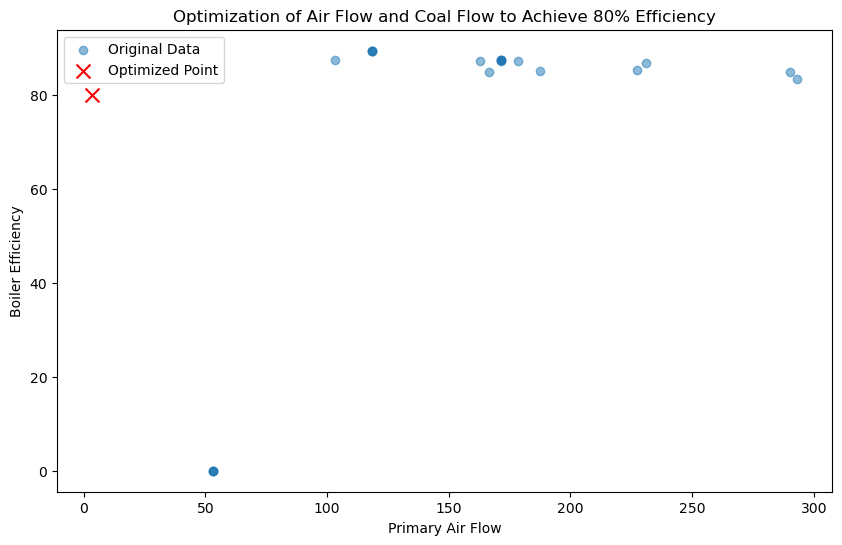

In [5]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['PRIMARY AIR FLOW'], merged_df['Boiler Efficiency'], label='Original Data', alpha=0.5)
plt.scatter(optimized_air_flow, 80, color='red', label='Optimized Point', marker='x', s=100)

plt.xlabel('Primary Air Flow')
plt.ylabel('Boiler Efficiency')
plt.title('Optimization of Air Flow and Coal Flow to Achieve 80% Efficiency')
plt.legend()
plt.show()
